# Capstone Project-Crimes in India

# Phase 3

# Data Collection/preparation part

Data collected from below links:
    
1.The population of each state

Link :https://data.gov.in/search?title=population
        
2.Literacy Rate in each state

Link: https://data.gov.in/search?title=Literacy%20Rate%20in%20each%20state
        
3.Area of each state

Link: https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_area

4. Total Crime

Download Files
India_Crime - Copy.zip


In [1]:
#Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# SQL Operations

# 3.1 Insert records from 

42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [236]:
import sqlite3

In [237]:
db=sqlite3.connect("C:\\Users\\BHAVITH\\OneDrive\\Desktop\\Capstone project\Working file\\India_Crime - Copy\\District_wise_crimes.db")

In [238]:
#Declare cursor
cursor = db.cursor()

In [298]:
cursor.execute("DROP TABLE IF EXISTS Crime_against_women_2001_2011")

In [347]:
#Create table
cursor.execute("CREATE TABLE Crime_against_women_2001_2011(State_UT TEXT, District TEXT,Year INT, Rape INT,Kidnapping_Abduction INT,Dowry_Deaths INT,Assault_on_women_with_intent_to_outrage_her_modesty INT,Insult_to_modesty_of_Women INT,Cruelty_by_Husband_his_Relatives INT,Importation_of_Girls INT)")

In [252]:
cursor.execute("DROP TABLE IF EXISTS Crime_against_women_2001_2012")

In [348]:
with open('C:\\Users\\BHAVITH\\OneDrive\\Desktop\\Capstone project\\Working file\\India_Crime - Copy\\42_District_wise_crimes_committed_against_women_2001_2012.csv','r') as file:
    total_records=0
    for row in file:
        cursor.execute("insert into Crime_against_women_2001_2011 values(?,?,?,?,?,?,?,?,?,?)",row.split(","))
        db.commit()
        total_records+=1
print(total_records,'Records inserted')

8609 Records inserted


3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [350]:
sql_query1 = """WITH RankedCrimes AS (
    SELECT
        State_UT,
        District,
        Year,
        Rape,
        RANK() OVER (PARTITION BY Year ORDER BY Rape DESC) AS RapeRank
    FROM
        Crime_against_women_2001_2011
)
SELECT
    State_UT,
    District,
    Year,
    Rape AS Highest_Rapes
FROM
    RankedCrimes
WHERE
    RapeRank = 1; """

cursor.execute(sql_query1)

# Fetch the result
result1 = cursor.fetchall()
print(result1)


[('DELHI', 'DELHI UT TOTAL', 2001, 381), ('DELHI', 'DELHI UT TOTAL', 2002, 403), ('DELHI', 'DELHI UT TOTAL', 2003, 490), ('DELHI', 'DELHI UT TOTAL', 2004, 551), ('DELHI', 'DELHI UT TOTAL', 2005, 658), ('DELHI', 'DELHI UT TOTAL', 2006, 623), ('DELHI', 'DELHI UT TOTAL', 2007, 598), ('DELHI', 'DELHI UT TOTAL', 2008, 466), ('WEST BENGAL', 'MURSHIDABAD', 2009, 568), ('WEST BENGAL', 'MURSHIDABAD', 2010, 526), ('DELHI', 'DELHI UT TOTAL', 2011, 572), ('DELHI', 'DELHI UT TOTAL', 2012, 706)]


In [303]:
sql_query2 = """WITH RankedCrimes AS (
    SELECT
        State_UT,
        District,
        Year,
        Kidnapping_Abduction,
        RANK() OVER (ORDER BY Kidnapping_Abduction DESC) AS Kidnapping_AbductionRank
    FROM
        Crime_against_women_2001_2011
)
SELECT
    State_UT,
    District,
    Year,
    Kidnapping_Abduction AS Highest_Kidnapping_Abduction
FROM
    RankedCrimes
WHERE
    Kidnapping_AbductionRank = 1; """

cursor.execute(sql_query2)

# Fetch the result
result2 = cursor.fetchall()
print(result2)

('DELHI', 'DELHI UT TOTAL', 2012, 2160)


3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [304]:
sql_query3 = """WITH RankedCrimes AS (
    SELECT
        State_UT,
        District,
        Year,
        Rape,
        RANK() OVER (ORDER BY Rape) AS RapeRank
    FROM
        Crime_against_women_2001_2011
)
SELECT
    State_UT,
    District,
    Year,
    Rape AS Minimum_Rapes
FROM
    RankedCrimes
WHERE
    RapeRank = 1; """

cursor.execute(sql_query3)

# Fetch the result
result3 = cursor.fetchone()
print(result3)

('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0)


In [305]:
sql_query4 = """WITH RankedCrimes AS (
    SELECT
        State_UT,
        District,
        Year,
        Kidnapping_Abduction,
        RANK() OVER (ORDER BY Kidnapping_Abduction) AS Kidnapping_AbductionRank
    FROM
        Crime_against_women_2001_2011
)
SELECT
    State_UT,
    District,
    Year,
    Kidnapping_Abduction AS Minimum_Kidnapping_Abduction
FROM
    RankedCrimes
WHERE
    Kidnapping_AbductionRank = 1; """

cursor.execute(sql_query4)

# Fetch the result
result4 = cursor.fetchone()
print(result4)

('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0)


3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [306]:
db=sqlite3.connect("C:\\Users\\BHAVITH\\OneDrive\\Desktop\\Capstone project\Working file\\India_Crime - Copy\\crimes_committed_against_ST.db")

In [308]:
#Declare cursor
cursor = db.cursor()

In [314]:
cursor.execute("DROP TABLE IF EXISTS Crime_against_ST_2001_2011")

In [315]:
#Create table
cursor.execute("CREATE TABLE Crime_against_ST_2001_2011(State_UT TEXT, District TEXT,Year INT, Murder INT,Rape INT,Kidnapping_Abduction INT,Dacoity INT,Robbery INT,Arson INT,Hurt INT,Protection_of_Civil Rights_Act INT,Prevention_of_atrocities_Act INT,Other_Crimes_Against_STs INT)")

In [316]:
with open('C:\\Users\\BHAVITH\\OneDrive\\Desktop\\Capstone project\\Working file\\India_Crime - Copy\\02_District_wise_crimes_committed_against_ST_2001_2012_V1.csv','r') as file:
    total_records=0
    for row in file:
        cursor.execute("insert into Crime_against_ST_2001_2011 values(?,?,?,?,?,?,?,?,?,?,?,?,?)",row.split(","))
        db.commit()
        total_records+=1
print(total_records,'Records inserted')

8597 Records inserted


3.5Write SQL query to find the highest number of dacoity/robbery in which district.

In [317]:
sql_query1 = """WITH RankedCrimes AS (
    SELECT
        District,
        Dacoity,
        RANK() OVER (ORDER BY Dacoity DESC) AS DacoityRank
    FROM
        Crime_against_ST_2001_2011
)
SELECT
    District,
    Dacoity AS Highest_Dacoity
FROM
    RankedCrimes
WHERE
    DacoityRank = 1; """

cursor.execute(sql_query1)

# Fetch the result
result1 = cursor.fetchone()
print(result1)

('DAHOD', 29)


In [318]:
sql_query1 = """WITH RankedCrimes AS (
    SELECT
        District,
        Robbery,
        RANK() OVER (ORDER BY Robbery DESC) AS RobberyRank
    FROM
        Crime_against_ST_2001_2011
)
SELECT
    District,
    Robbery AS Highest_Dacoity
FROM
    RankedCrimes
WHERE
    RobberyRank = 1; """

cursor.execute(sql_query1)

# Fetch the result
result1 = cursor.fetchone()
print(result1)

('DAHOD', 32)


3.6 Write SQL query to find in which districts(All) the lowest number of murders happened

In [319]:
sql_query1 = """WITH RankedCrimes AS (
    SELECT
        District,
        Murder,
        RANK() OVER (ORDER BY Murder ) AS MurderRank
    FROM
        Crime_against_ST_2001_2011
)
SELECT
    District,
    Murder AS Minimum_Murder
FROM
    RankedCrimes
WHERE
    MurderRank = 1; """

cursor.execute(sql_query1)

# Fetch the result
result1 = cursor.fetchone()
print(result1)

('ADILABAD', 0)


3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.

In [321]:
sql_query1 = """
SELECT
    District,
    Year,
    Murder
FROM
    Crime_against_ST_2001_2011
ORDER BY
    District ASC, Year ASC, Murder ASC; """


cursor.execute(sql_query1)

# Fetch the result
result1 = cursor.fetchall()
print(result1)

[('24 PARGANAS NORTH', 2001, 0), ('24 PARGANAS NORTH', 2002, 0), ('24 PARGANAS NORTH', 2003, 0), ('24 PARGANAS NORTH', 2004, 0), ('24 PARGANAS NORTH', 2005, 0), ('24 PARGANAS NORTH', 2006, 0), ('24 PARGANAS NORTH', 2007, 0), ('24 PARGANAS NORTH', 2008, 0), ('24 PARGANAS NORTH', 2009, 0), ('24 PARGANAS NORTH', 2010, 0), ('24 PARGANAS NORTH', 2011, 0), ('24 PARGANAS NORTH', 2012, 0), ('24 PARGANAS SOUTH', 2001, 0), ('24 PARGANAS SOUTH', 2002, 0), ('24 PARGANAS SOUTH', 2003, 0), ('24 PARGANAS SOUTH', 2004, 0), ('24 PARGANAS SOUTH', 2005, 0), ('24 PARGANAS SOUTH', 2006, 0), ('24 PARGANAS SOUTH', 2007, 0), ('24 PARGANAS SOUTH', 2008, 0), ('24 PARGANAS SOUTH', 2009, 0), ('24 PARGANAS SOUTH', 2010, 0), ('24 PARGANAS SOUTH', 2011, 0), ('24 PARGANAS SOUTH', 2012, 0), ('A and N ISLANDS', 2007, 0), ('ADILABAD', 2001, 0), ('ADILABAD', 2002, 0), ('ADILABAD', 2003, 0), ('ADILABAD', 2004, 0), ('ADILABAD', 2005, 0), ('ADILABAD', 2006, 0), ('ADILABAD', 2007, 1), ('ADILABAD', 2008, 0), ('ADILABAD', 2009

In [326]:
# Define column names
column_names = ["District","Year" ,"Murder"]

# Convert list to DataFrame
df = pd.DataFrame(result1, columns=column_names)

# Display the DataFrame
df

,District,Year,Murder
0,24 PARGANAS NORTH,2001,0
1,24 PARGANAS NORTH,2002,0
2,24 PARGANAS NORTH,2003,0
3,24 PARGANAS NORTH,2004,0
4,24 PARGANAS NORTH,2005,0
...,...,...,...
8592,ZUNHEBOTO,2008,0
8593,ZUNHEBOTO,2009,0
8594,ZUNHEBOTO,2010,0
8595,ZUNHEBOTO,2011,0


3.8.1Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [327]:
db=sqlite3.connect("C:\\Users\\BHAVITH\\OneDrive\\Desktop\\Capstone project\Working file\\India_Crime - Copy\\crimes_committed_IPC.db")

In [328]:
#Declare cursor
cursor = db.cursor()

In [329]:
#Create table
cursor.execute("CREATE TABLE Crime_against_IPC_2001_2011(State_UT TEXT, District TEXT,Year INT, Murder INT,ATTEMPT_TO_MURDER INT,Rape INT)")

In [331]:
with open('C:\\Users\\BHAVITH\\OneDrive\\Desktop\\Capstone project\\Working file\\India_Crime - Copy\\01_District_wise_crimes_committed_IPC_2001_2012_V1.csv','r') as file:
    total_records=0
    for row in file:
        cursor.execute("insert into Crime_against_IPC_2001_2011 values(?,?,?,?,?,?)",row.split(","))
        db.commit()
        total_records+=1
print(total_records,'Records inserted')

9017 Records inserted


3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [341]:
sql_query5 = """
WITH Murder AS (
    SELECT
        STATE_UT,
        District,
        Year,
        Murder,
        RANK() OVER (PARTITION BY STATE_UT, Year ORDER BY Murder DESC) AS MurderRank
    FROM
        Crime_against_IPC_2001_2011
)
SELECT
    STATE_UT,
    Year,
    District,
    Murder
FROM
    Murder
WHERE
    MurderRank = 1;"""

cursor.execute(sql_query5)

# Fetch the result
result1 = cursor.fetchall()
print(result1)

[('A & N ISLANDS', 2001, 'ANDAMAN', 13), ('A & N ISLANDS', 2001, 'TOTAL', 13), ('A & N ISLANDS', 2001, 'ANDAMAN', 13), ('A & N ISLANDS', 2001, 'TOTAL', 13), ('A & N ISLANDS', 2002, 'TOTAL', 17), ('A & N ISLANDS', 2002, 'TOTAL', 17), ('A & N ISLANDS', 2003, 'TOTAL', 21), ('A & N ISLANDS', 2003, 'TOTAL', 21), ('A & N ISLANDS', 2004, 'TOTAL', 15), ('A & N ISLANDS', 2004, 'TOTAL', 15), ('A & N ISLANDS', 2005, 'ANDAMAN', 14), ('A & N ISLANDS', 2005, 'TOTAL', 14), ('A & N ISLANDS', 2005, 'ANDAMAN', 14), ('A & N ISLANDS', 2005, 'TOTAL', 14), ('A & N ISLANDS', 2006, 'TOTAL', 4), ('A & N ISLANDS', 2006, 'TOTAL', 4), ('A & N ISLANDS', 2007, 'A and N ISLANDS', 15), ('A & N ISLANDS', 2007, 'TOTAL', 15), ('A & N ISLANDS', 2007, 'A and N ISLANDS', 15), ('A & N ISLANDS', 2007, 'TOTAL', 15), ('A & N ISLANDS', 2008, 'ANDAMAN', 8), ('A & N ISLANDS', 2008, 'TOTAL', 8), ('A & N ISLANDS', 2008, 'ANDAMAN', 8), ('A & N ISLANDS', 2008, 'TOTAL', 8), ('A & N ISLANDS', 2009, 'ANDAMAN', 15), ('A & N ISLANDS', 200

In [345]:
# Define column names
column_names1 = ["State_UT","Year" ,"District","Murder"]

# Convert list to DataFrame
df1 = pd.DataFrame(result1, columns=column_names1)

# Display the DataFrame
df1

,State_UT,Year,District,Murder
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2001,TOTAL,13
2,A & N ISLANDS,2001,ANDAMAN,13
3,A & N ISLANDS,2001,TOTAL,13
4,A & N ISLANDS,2002,TOTAL,17
...,...,...,...,...
948,WEST BENGAL,2010,TOTAL,2398
949,WEST BENGAL,2011,TOTAL,2109
950,WEST BENGAL,2011,TOTAL,2109
951,WEST BENGAL,2012,TOTAL,2252


3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [356]:
# Define column names
column_names6 = ["State_UT","District","Year","Rape"]

# Convert list to DataFrame
df2 = pd.DataFrame(result1, columns=column_names6)

# Display the DataFrame
df2

,State_UT,District,Year,Rape
0,DELHI,DELHI UT TOTAL,2001,381
1,DELHI,DELHI UT TOTAL,2002,403
2,DELHI,DELHI UT TOTAL,2003,490
3,DELHI,DELHI UT TOTAL,2004,551
4,DELHI,DELHI UT TOTAL,2005,658
5,DELHI,DELHI UT TOTAL,2006,623
6,DELHI,DELHI UT TOTAL,2007,598
7,DELHI,DELHI UT TOTAL,2008,466
8,WEST BENGAL,MURSHIDABAD,2009,568
9,WEST BENGAL,MURSHIDABAD,2010,526


In [357]:
# Count the number of years each district appears
district_counts = df2['District'].value_counts()

# Filter districts that appear 3 or more than 3 years
filtered_districts = district_counts[district_counts >= 3].index

# Filter the original DataFrame based on the selected districts
filtered_result = df2[df2['District'].isin(filtered_districts)]

# Print the filtered result in descending order by year
sorted_result = filtered_result.sort_values(by=['Year'], ascending=False)
print(sorted_result)

   State_UT        District  Year  Rape
11    DELHI  DELHI UT TOTAL  2012   706
10    DELHI  DELHI UT TOTAL  2011   572
7     DELHI  DELHI UT TOTAL  2008   466
6     DELHI  DELHI UT TOTAL  2007   598
5     DELHI  DELHI UT TOTAL  2006   623
4     DELHI  DELHI UT TOTAL  2005   658
3     DELHI  DELHI UT TOTAL  2004   551
2     DELHI  DELHI UT TOTAL  2003   490
1     DELHI  DELHI UT TOTAL  2002   403
0     DELHI  DELHI UT TOTAL  2001   381


3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

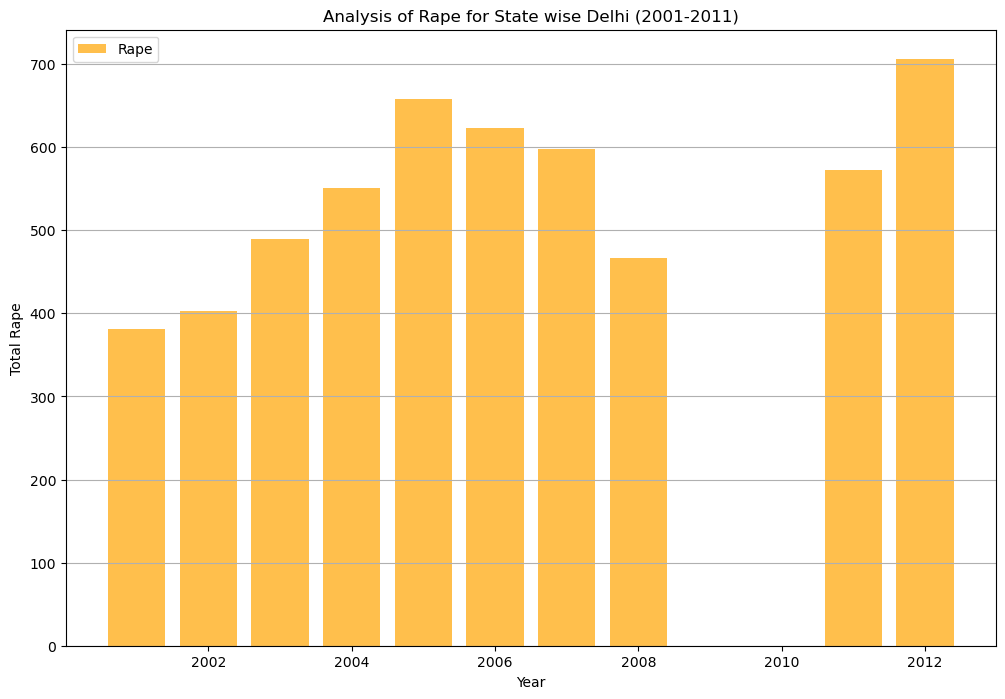

In [358]:

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Bar chart for year-on-year total crime rate
ax.bar(sorted_result['Year'], sorted_result['Rape'], color='orange', alpha=0.7, label='Rape')

# Labeling
ax.set_title('Analysis of Rape for State wise Delhi (2001-2011)')
ax.set_xlabel('Year')
ax.set_ylabel('Total Rape')
ax.legend()
ax.grid(axis='y')

plt.show()

# Phase-3 ......END